# 04b - Comparing MCMC with random sampling

This notebook reproduces Figs. 4b,c from the manuscript. The data in this notebook compares the energies of structures from random sampling vs MCMC ones.

In [1]:
import json
import itertools
from basics import *
from plotting import *
from matplotlib import cm
from ase import Atoms
from scipy import stats
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from plotting import savefig

plt.style.use("paper")

## Visualizing the Monte Carlo approach

In [2]:
facets = [100, 111, 211, 331, 410, 711]
nads = np.arange(2, 24)
num_sites = {100: 16, 111: 16, 211: 24, 331: 24, 410: 24, 711: 16}

ORIGINAL = "#2F4259"
SAMPLED = "#C84260"

## Comparing previous relaxed energies and sampled ones

In [3]:
old = pd.read_json("../data/231003-COv-data.json").rename(columns={"num_adsorbates": "n"})
new = pd.read_csv("../data/05-mcmc-relax/231127-mcmc-relax.csv", index_col=0)

In [4]:
old = old[["facet", "n", "unrelax_id", "unrelax_binding_site", "relax_id", "relax_binding_site"]]

In [5]:
old["cov"] = [row["n"] / num_sites[row["facet"]] for _, row in old.iterrows()]
new["cov"] = [row["n"] / num_sites[row["facet"]] for _, row in new.iterrows()]

In [6]:
old

,facet,n,unrelax_id,unrelax_binding_site,relax_id,relax_binding_site,cov
0,111,9,2305,0.233935,NaN,NaN,0.5625
1,100,1,32,0.137585,3400.0,-0.469819,0.0625
2,100,2,33,-0.127593,3438.0,-0.528158,0.1250
3,100,2,34,-0.415213,3411.0,-0.580090,0.1250
4,100,2,35,-0.098892,3394.0,-0.518803,0.1250
...,...,...,...,...,...,...,...
6788,211,18,19077,2.052192,NaN,NaN,0.7500
6789,211,18,19078,1.777975,NaN,NaN,0.7500
6790,211,18,19074,1.928995,NaN,NaN,0.7500
6791,211,18,19075,2.173271,NaN,NaN,0.7500


In [7]:
len(old.dropna())

675

## Unrelax data

In [8]:
old["unrelax_binding_site"].describe()

count    6793.000000
mean        0.748950
std         0.940335
min        -0.596088
25%         0.071938
50%         0.364576
75%         1.249952
max         5.528639
Name: unrelax_binding_site, dtype: float64

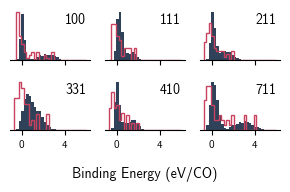

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(3, 2), sharex=True)

bins = np.linspace(-0.75, 6, 30)

for ax, facet in zip(axs.ravel(), facets):
    j = facets.index(facet)
    subold = old.loc[old.facet == facet]
    subnew = new.loc[new.facet == facet]
    ax.hist(subold["unrelax_binding_site"], bins=bins, color=ORIGINAL, density=True)
    ax.hist(subnew["unrelax_binding_site"], bins=bins, color=SAMPLED, histtype="step", density=True)
    ax.annotate(facet, (0.95, 0.95), xycoords="axes fraction", ha="right", va="top")

for ax in axs.reshape(-1):
    ax.spines["left"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
for ax in axs[-1, :]:
    ticks = [0, 4]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=8)

fig.supxlabel("Binding Energy (eV/CO)", y=0.065, fontsize=10)

fig.tight_layout()
savefig(fig, "04-unrelax-distributions.pdf")
plt.show()

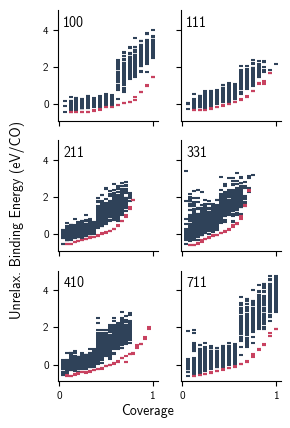

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(3, 4.5), sharex=True, sharey=True)

for ax, facet in zip(axs.ravel(), facets):
    j = facets.index(facet)
    subold = old.loc[(old.facet == facet) & (old["cov"] <= 1.0)]
    subnew = new.loc[(new.facet == facet) & (new["cov"] <= 1.0)]
    
    ax.scatter(
        subold["cov"],
        subold["unrelax_binding_site"],
        color=ORIGINAL,
        marker="_",
        s=12,
    )
    ax.scatter(
        subnew["cov"],
        subnew["unrelax_binding_site"],
        color=SAMPLED,
        marker="_",
        s=12,
    )

    ax.annotate(facet, (0.05, 0.95), xycoords="axes fraction", ha="left", va="top")

fig.supylabel("Unrelax. Binding Energy (eV/CO)", x=0.04, fontsize=10)
fig.supxlabel("Coverage", y=0.06, fontsize=10)

fig.tight_layout()
savefig(fig, "04-unrelax-binding.pdf")
plt.show()